In [1]:
import os
from pyprojroot import here
project_root = here()
print(f"Changing working directory to {project_root}")
os.chdir(project_root)


# Subtitle segmentation



In [2]:
from bigchina.analyzer import *

tiger = segment_subtitle_file("data/subtitles/Tiger.Dragon.srt")
tiger

,segment,characteristic,is_punctuation,sentence,sentence_word_id
0,喲,noun,False,0,0
1,!,punctuation mark,True,1,0
3,李,noun,False,1,1
4,爺,noun,False,1,2
5,來,noun,False,1,3
...,...,...,...,...,...
10985,.,punctuation mark,True,1799,0
10987,一起,locative word,False,1799,1
10988,回,verb,False,1799,2
10989,新疆,noun,False,1799,3


In [3]:
tiger.characteristic.value_counts()

noun                    3504
punctuation mark        1800
verb                    1439
pronoun                  889
adverb                   568
particle                 416
adjective                295
modal particle           228
preposition              221
classifier               139
numeral                  135
conjunction               68
noun of locality          65
distinguishing word       53
time word                 42
interjection              14
locative word             12
multiword expression       4
prefix                     2
suffix                     2
Name: characteristic, dtype: int64

<AxesSubplot:xlabel='characteristic'>

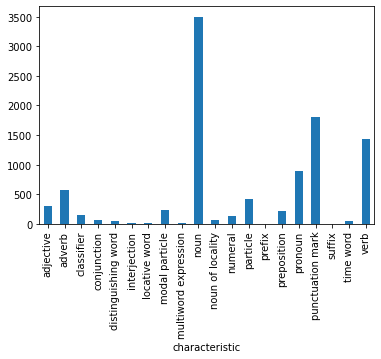

In [4]:
tiger.groupby("characteristic")["segment"].count().plot.bar()

In [5]:
df = tiger[tiger.characteristic != "punctuation mark"]
df = df.groupby("segment").count().reset_index()[["segment", "characteristic"]]

df = df.rename(columns = {"segment": "word", "characteristic": "count"})

df.sort_values("count", ascending=False).head(20)

,word,count
633,我,331
128,你,295
959,的,290
750,是,211
78,了,199
43,不,169
1266,這,145
134,來,108
513,就,96
767,有,90
